**Bellabeat, Case Study On Fitness Tracker**

Analyzing Fitbit Fitness Tracker Data With R

Nihar Patel

2022-12-10




#### **About Bellabeat**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Majorly focusing on women, it has rapidly grown since it's foundation in 2013. Bellabeat is the go-to wellness brand for women with an ecosystem of products and services focused on women’s health. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. 


#### **Analyzing for**

1. Some trends in smart device usage
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### **Business Task**

Analyze the data to identify the ways Bellabeat can grow, using trends, knowing how customers use the smart devices and use the data for effective marketing strategy.

#### **Data Source**

The data used for analysis was taken from Kaggle. [Data Source](https://www.kaggle.com/datasets/arashnic/fitbit).
Assuming that the data is on all genders and not specifically women as there is no mention.

In [1]:
#### Importing and Loading Data

library(tidyverse) # metapackage of all tidyverse packages
library(rmarkdown)
library(data.table)
library(lubridate)

dailyActivity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartrate_seconds <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
intensity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (1

#### Brief View Of Data Sets Used

In [2]:
head(dailyActivity)
glimpse(sleepDay)
head(weight_log)
head(heartrate_seconds)
head(intensity)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


#### Cleaning Data


Found 3 duplicate rows in SleepDay data.

In [3]:
dailyActivity_clean <- dailyActivity %>% 
  distinct()

sleepDay_clean <- sleepDay %>% 
  distinct()
dupli <- sleepDay %>% 
  group_by(Id, SleepDay) %>% 
  mutate(num_dups = n(), dup_id = row_number()) %>% 
  ungroup() %>% 
  filter(num_dups > 1)
head(dupli)

heartrate_clean <- heartrate_seconds %>% 
  distinct()

weight_log_clean <- weight_log %>% 
  distinct()

intensity_clean <- intensity %>% 
  distinct()



Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,num_dups,dup_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
4388161847,5/5/2016 12:00:00 AM,1,471,495,2,1
4388161847,5/5/2016 12:00:00 AM,1,471,495,2,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2,1
4702921684,5/7/2016 12:00:00 AM,1,520,543,2,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2,1
8378563200,4/25/2016 12:00:00 AM,1,388,402,2,2


#### Changing the Date Format From Character To Date

In [4]:
dailyActivity_clean$ActivityDate <- as.POSIXct(dailyActivity_clean$ActivityDate,
        format = "%m/%d/%Y", tz = Sys.timezone())
dailyActivity_clean$dates <- format(dailyActivity_clean$ActivityDate,
                                   format = "%m/%d/%y")


sleepDay_clean$SleepDay <- as.POSIXct(sleepDay_clean$SleepDay,
                                      format = "%m/%d/%Y %H:%M:%S %p",
                                      tz = Sys.timezone())
sleepDay_clean$dates <- format(sleepDay_clean$SleepDay,
                               format = "%m/%d/%y")


heartrate_clean$Time <- as.POSIXct(heartrate_clean$Time,
                                   format = "%m/%d/%Y %I:%M:%S %p",
                                   tz = Sys.timezone())

heartrate_clean$date <- format(heartrate_clean$Time, 
                               format = "%m/%d/%y")


weight_log_clean$Date <- as.POSIXct(weight_log_clean$Date,
                                    format = "%m/%d/%Y",
                                    tz = Sys.timezone())


intensity_clean$ActivityHour <- as.POSIXct(intensity_clean$ActivityHour,
      format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
intensity_clean$time <- format(intensity_clean$ActivityHour,
                               format = "%H:%M:%S")
intensity_clean$date <- format(intensity_clean$ActivityHour,
                               format = "%m/%d/%y")


Added a dates column to ActivityDate data as it will be used to join with other data set.
Changed wheightLog Date column to mdy format as time column  would merge with each time log when joining the data.
Main purpose is to join by Date only excluding time.

#### Filtering Data For Further Cleaning


Cleaning the data that can cause bias or are outliers and checking for inconsistency.
Using two particular functions: filter() and length().

In [5]:
# removing rows which might lead to faulty analysis
dailyActivity_clean <- dailyActivity_clean %>% 
  filter(!SedentaryMinutes == 0)

dailyActivity_clean <- dailyActivity_clean %>% 
  filter(!Calories < 500)

length(which(dailyActivity$SedentaryMinutes == 0))
length(which(dailyActivity$Calories == 0))

filtered_distance <- dailyActivity %>% 
  filter(TotalDistance == 0)
head(filtered_distance)

filtered_sedentary_min <- dailyActivity %>% 
  filter(SedentaryMinutes == 0)
str(filtered_sedentary_min)

filtered_calories <- dailyActivity %>% 
  filter(Calories < 500 & SedentaryMinutes < 300)
str(filtered_calories)

date_filter_heart <- heartrate_clean %>% 
  filter(Time < "2016-04-12 00:00:00" | Time > "2016-05-12 16:20:00")

lowest_heart_rate <- heartrate_clean %>% 
  filter(Value < 50)
n_distinct(lowest_heart_rate$Id)

highest_heart_rate <- heartrate_clean %>% 
  filter(Value > 190)
n_distinct(highest_heart_rate$Id)

weight_log_clean <- weight_log_clean %>% 
  select(Id, Date, WeightKg, BMI)



[1] 1

[1] 4

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,5/12/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0
1844505072,4/24/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,4/25/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,4/26/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
1844505072,4/27/2016,4,0,0,0,0,0,0,0,0,0,1,1439,1348
1844505072,5/2/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1348


spec_tbl_df [1 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num 4.32e+09
 $ ActivityDate            : chr "5/12/2016"
 $ TotalSteps              : num 17
 $ TotalDistance           : num 0.01
 $ TrackerDistance         : num 0.01
 $ LoggedActivitiesDistance: num 0
 $ VeryActiveDistance      : num 0
 $ ModeratelyActiveDistance: num 0
 $ LightActiveDistance     : num 0.01
 $ SedentaryActiveDistance : num 0
 $ VeryActiveMinutes       : num 0
 $ FairlyActiveMinutes     : num 0
 $ LightlyActiveMinutes    : num 2
 $ SedentaryMinutes        : num 0
 $ Calories                : num 257
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDate = col_character(),
  ..   TotalSteps = col_double(),
  ..   TotalDistance = col_double(),
  ..   TrackerDistance = col_double(),
  ..   LoggedActivitiesDistance = col_double(),
  ..   VeryActiveDistance = col_double(),
  ..   ModeratelyActiveDistance = col_double(),
  ..   LightActiveDistance = col_double()

[1] 10

[1] 4

#### Summarizing Data After Cleaning

In [6]:
summary(dailyActivity_clean)
summary(sleepDay_clean)
summary(weight_log_clean)

       Id             ActivityDate                   TotalSteps   
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :    0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.: 3890  
 Median :4.445e+09   Median :2016-04-26 00:00:00   Median : 7502  
 Mean   :4.847e+09   Mean   :2016-04-26 04:09:01   Mean   : 7711  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:10738  
 Max.   :8.878e+09   Max.   :2016-05-12 00:00:00   Max.   :36019  
 TotalDistance    TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.670   1st Qu.: 2.670   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.280   Median : 5.280   Median :0.0000           Median : 0.220    
 Mean   : 5.542   Mean   : 5.528   Mean   :0.1092           Mean   : 1.517    
 3rd Qu.: 7.725   3rd Qu.: 7.720   3rd Qu.:0.0000           3rd Qu.: 2.095    
 Max.   :28.030   Max.   :28.030   Max.   :4.9421        

       Id               SleepDay                   TotalSleepRecords
 Min.   :1.504e+09   Min.   :2016-04-12 12:00:00   Min.   :1.00     
 1st Qu.:3.977e+09   1st Qu.:2016-04-19 12:00:00   1st Qu.:1.00     
 Median :4.703e+09   Median :2016-04-27 12:00:00   Median :1.00     
 Mean   :4.995e+09   Mean   :2016-04-26 23:38:55   Mean   :1.12     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 12:00:00   3rd Qu.:1.00     
 Max.   :8.792e+09   Max.   :2016-05-12 12:00:00   Max.   :3.00     
 TotalMinutesAsleep TotalTimeInBed     dates          
 Min.   : 58.0      Min.   : 61.0   Length:410        
 1st Qu.:361.0      1st Qu.:403.8   Class :character  
 Median :432.5      Median :463.0   Mode  :character  
 Mean   :419.2      Mean   :458.5                     
 3rd Qu.:490.0      3rd Qu.:526.0                     
 Max.   :796.0      Max.   :961.0                     

       Id                 Date                        WeightKg     
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   : 52.60  
 1st Qu.:6.962e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.: 61.40  
 Median :6.962e+09   Median :2016-04-27 00:00:00   Median : 62.50  
 Mean   :7.009e+09   Mean   :2016-04-26 22:12:32   Mean   : 72.04  
 3rd Qu.:8.878e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.: 85.05  
 Max.   :8.878e+09   Max.   :2016-05-12 00:00:00   Max.   :133.50  
      BMI       
 Min.   :21.45  
 1st Qu.:23.96  
 Median :24.39  
 Mean   :25.19  
 3rd Qu.:25.56  
 Max.   :47.54  

#### Finding Mean by Grouping Id's

In [7]:
dailyActivity_clean_id_mean <- dailyActivity_clean %>% 
  group_by(Id) %>% 
  summarize(total_steps_mean = mean(TotalSteps),
            calories_mean = mean(Calories),
            sedentary_minutes_mean = mean(SedentaryMinutes))
head(dailyActivity_clean_id_mean)

sleepDay_clean_group_id <- sleepDay_clean %>% 
  group_by(Id) %>% 
  summarize(TotalMinutesAsleep_mean = mean(TotalMinutesAsleep),
            TotalTimeInBed_mean = mean(TotalTimeInBed))
head(sleepDay_clean_group_id)

weight_log_group_id <- weight_log_clean %>% 
  group_by(Id) %>% 
  summarize(weight_mean = WeightKg, bmi_mean = BMI)
head(weight_log_group_id)


Id,total_steps_mean,calories_mean,sedentary_minutes_mean
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12520.633,1876.967,828.4333
1624580081,5743.903,1483.355,1257.7419
1644430081,7282.967,2811.300,1161.8667
1844505072,2580.065,1573.484,1206.6129
1927972279,916.129,2172.806,1317.4194
2022484408,11370.645,2509.968,1112.5806


Id,TotalMinutesAsleep_mean,TotalTimeInBed_mean
<dbl>,<dbl>,<dbl>
1503960366,360.2800,383.2000
1644430081,294.0000,346.0000
1844505072,652.0000,961.0000
1927972279,417.0000,437.8000
2026352035,506.1786,537.6429
2320127002,61.0000,69.0000


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,weight_mean,bmi_mean
<dbl>,<dbl>,<dbl>
1503960366,52.6,22.65
1503960366,52.6,22.65
1927972279,133.5,47.54
2873212765,56.7,21.45
2873212765,57.3,21.69
4319703577,72.4,27.45


### **Data Visualization Using Plots**


#### *Total Steps vs Calories*
The Plot for Total Steps vs Calories shows a positive relationship. As it should be the body uses calories as we work.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



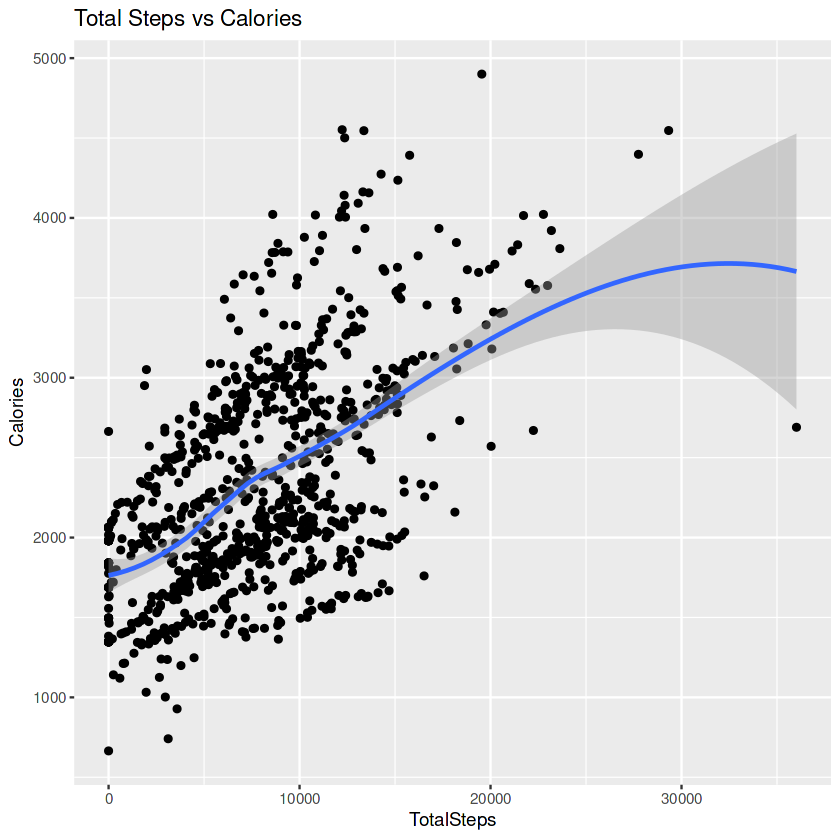

In [8]:
ggplot(data = dailyActivity_clean) +
  geom_point(aes(x = TotalSteps, y = Calories )) +
  geom_smooth(aes(x = TotalSteps, y = Calories))+
  labs(title = "Total Steps vs Calories")

#### *Relation between Time and Intensity*

In [9]:
intensity_clean_group_time <- intensity_clean %>% 
  group_by(time) %>% 
  drop_na() %>% 
  summarize(total_intensity_mean = mean(TotalIntensity))


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


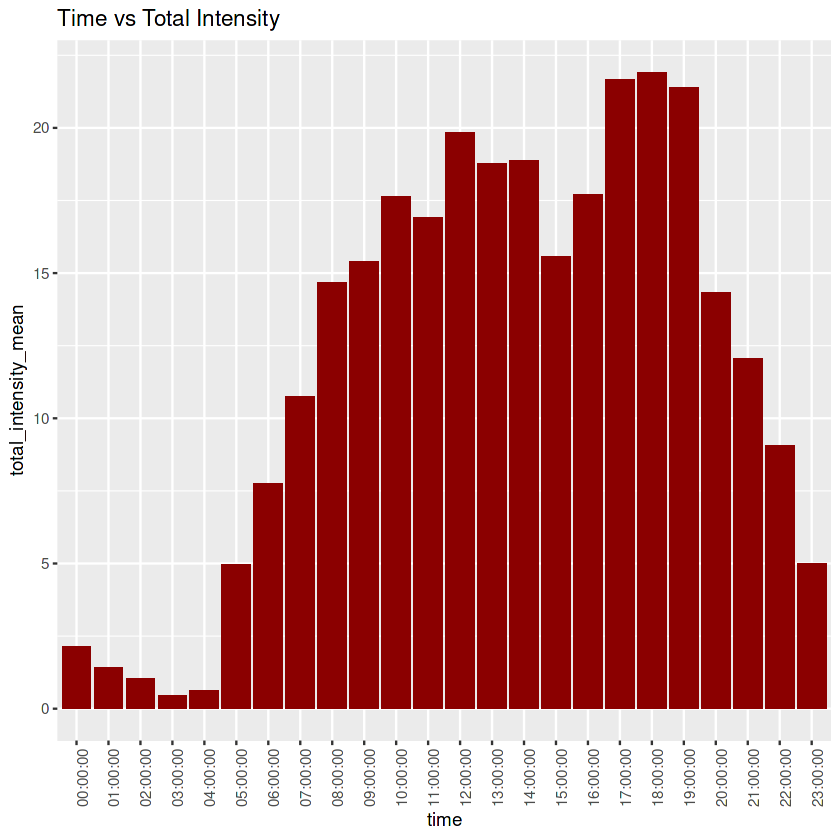

In [10]:

ggplot(data = intensity_clean_group_time,
       aes(x = time, y = total_intensity_mean))+
  geom_histogram(stat = "identity", fill = "darkred")+
  theme(axis.text.x = element_text(angle = 90))+
  labs(title = "Time vs Total Intensity")


**Most amount of workout is done between 5:00 PM to 7:00 PM or 17:00 to 19:00.**

#### *Relation Between Heart Rate and Time*

Converting Time from Heart Rate data to hours only 0 - 23, to compare with Intensity and hourly average heart rate

In [11]:
heartrate_clean_group_hourly <- heartrate_clean %>% 
  mutate(hour = as.POSIXct(Time)) %>% 
  group_by(hour = lubridate::hour(Time)) %>% 
  summarize(hear_beat_mean = mean(Value))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


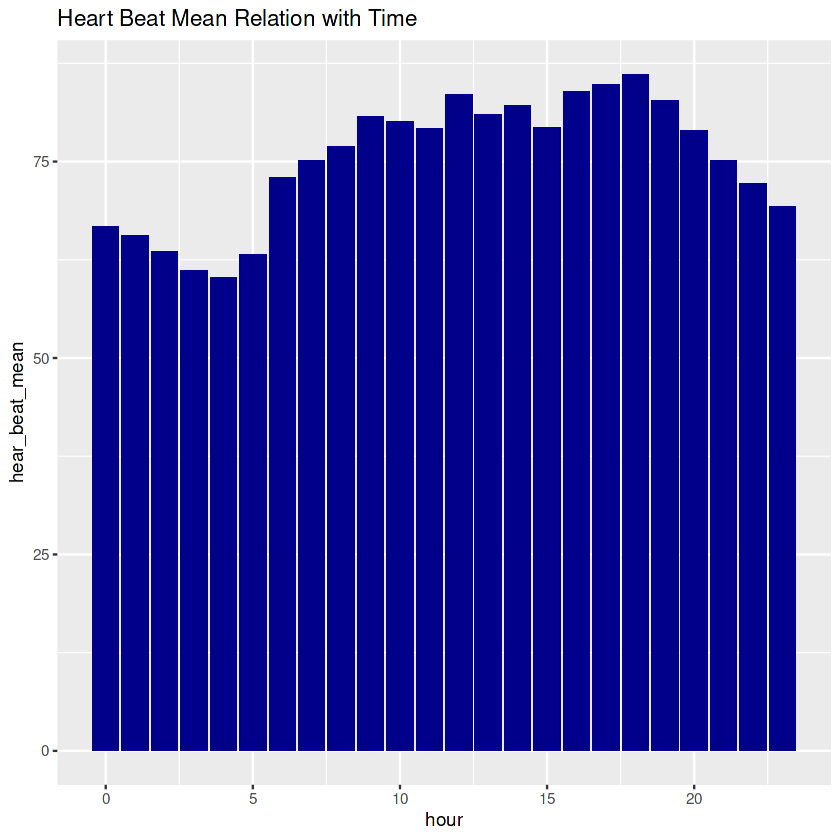

In [12]:
ggplot(heartrate_clean_group_hourly, aes(x = hour, y = hear_beat_mean))+
  geom_histogram(stat = "identity", fill = "darkblue")+
  labs(title = "Heart Beat Mean Relation with Time")

**The graph shows that the heart rate, is maximum during 17:00 to 19:00 IST, during which the Intensity is at its maximum as well. Hence with increase in intensity, heart beat increases.**

#### *Comparing Heart Beat Mean with Intensity Mean*
###### *Adding Intensity Mean Columns to Heart Rate Mean*


In [13]:
heartrate_intensity_join <- heartrate_clean_group_hourly %>% 
  mutate(intensity_clean_group_time)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



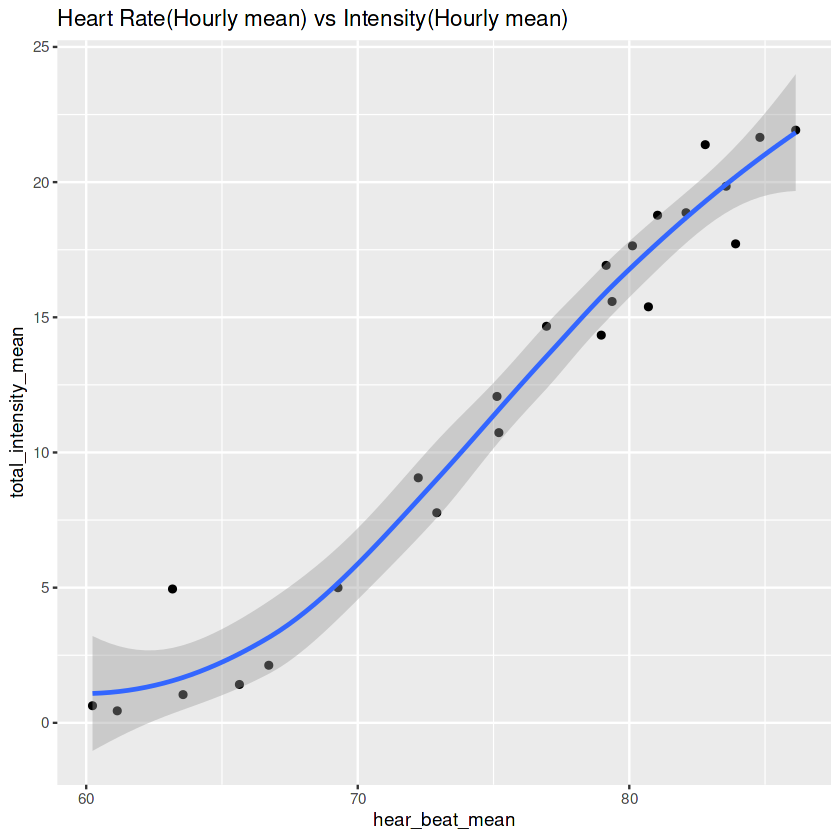

In [14]:
ggplot(heartrate_intensity_join,aes(x = hear_beat_mean,
                                    y = total_intensity_mean))+
  geom_point()+geom_smooth()+
  labs(title = "Heart Rate(Hourly mean) vs Intensity(Hourly mean)")


**The above graph proves that with increase in intensity the heart rate increases.**


#### *Plot For Total Sleep vs Time In Bed*

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



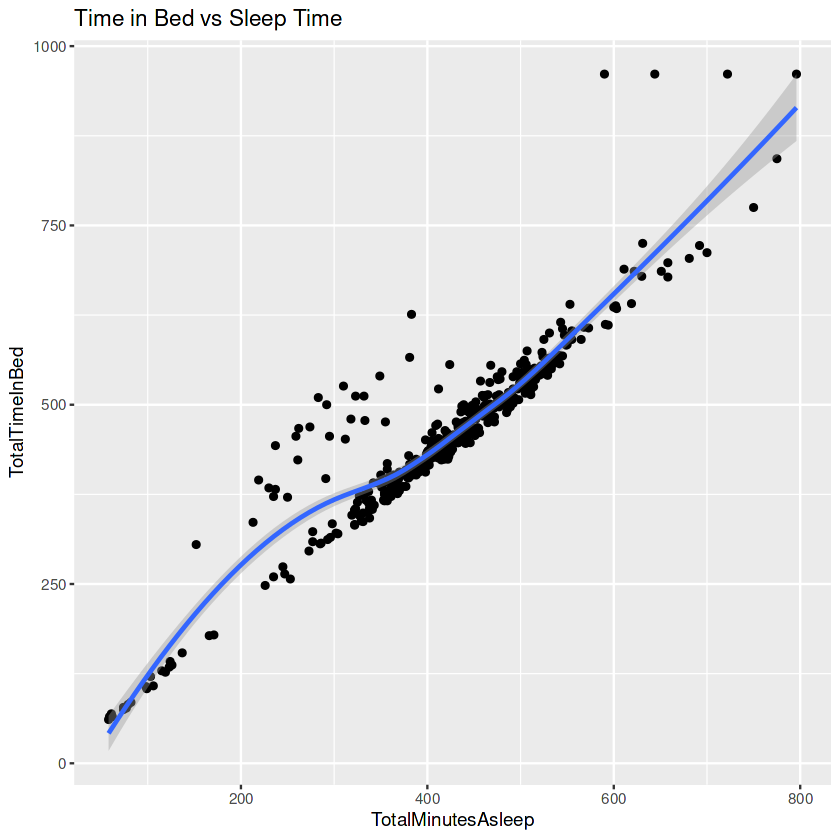

In [15]:
ggplot(sleepDay_clean, aes(x = TotalMinutesAsleep, y = TotalTimeInBed))+
  geom_point()+geom_smooth()+
  labs(title = "Time in Bed vs Sleep Time")


**This shows a linear relation between the two, the time spent in bed could be used to increase sleep time.**


#### *Average Of Difference between Time spent on Bed and Sleep Time*

An average person takes about 15-20 minutes to fall asleep. Time spent on bed more than that could be used in a better way.


In [16]:
sleepDay_clean_group_id <- sleepDay_clean %>% 
  group_by(Id) %>% 
  summarize(TotalMinutesAsleep_mean = mean(TotalMinutesAsleep),
            TotalTimeInBed_mean = mean(TotalTimeInBed),
            time_awake = TotalTimeInBed_mean - TotalMinutesAsleep_mean) %>% 
  arrange(-(time_awake))

head(sleepDay_clean_group_id)

Id,TotalMinutesAsleep_mean,TotalTimeInBed_mean,time_awake
<dbl>,<dbl>,<dbl>,<dbl>
1844505072,652.0000,961.0000,309.00000
3977333714,293.6429,461.1429,167.50000
1644430081,294.0000,346.0000,52.00000
2347167796,446.8000,491.3333,44.53333
5553957443,463.4839,505.8710,42.38710
8378563200,445.1290,485.9355,40.80645


#### *Plot For Sleep Time vs Sedentary Minutes*

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



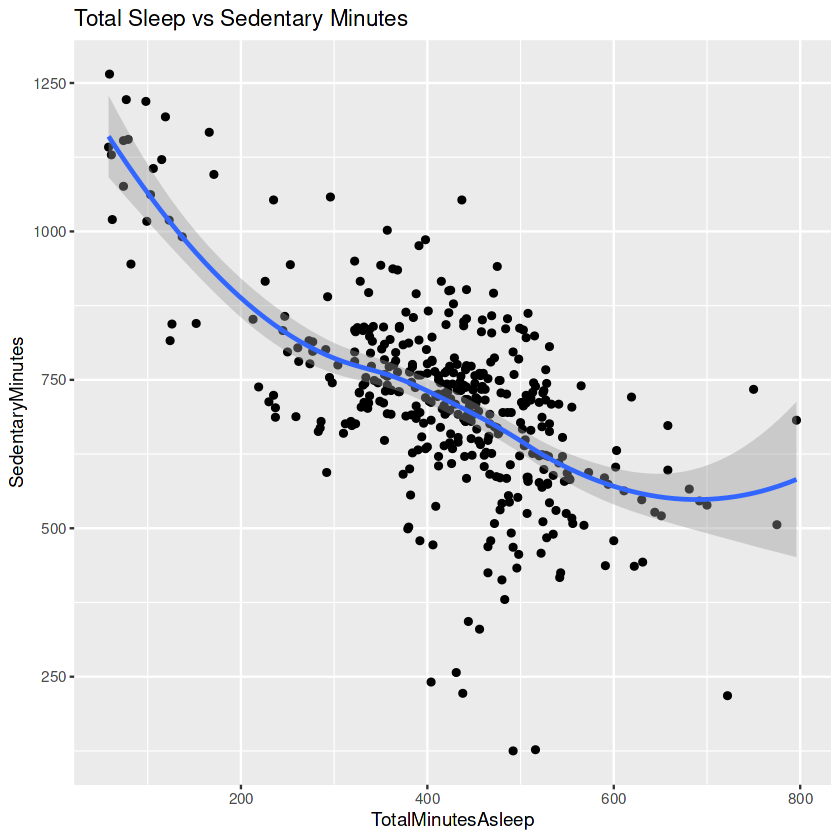

In [17]:
activity_sleep_join <- dailyActivity_clean %>% 
  merge(sleepDay_clean, by = c("Id", "dates"))
view(activity_sleep_join)

ggplot(activity_sleep_join, aes(x = TotalMinutesAsleep,
                                y = SedentaryMinutes))+
  geom_point()+geom_smooth()+
  labs(title = "Total Sleep vs Sedentary Minutes")


**The graph shows a negative relation. This could be used to motivate people to reduce sedentary minutes and improve sleep.**


#### *Comparing Calories burnt, Weight Lost of two users*


Using inner join to join weight log and daily activity. Then I summarize the data using, group_by(Id).


In [18]:
weight_log_id_8877689391 <- weight_log_clean %>% 
  filter(Id == 8877689391)
dailyActivity_id_8877689391 <- dailyActivity_clean %>% 
  filter(Id == 8877689391)
weight_log_id_8877689391$dates <- format(weight_log_id_8877689391$Date,
                format = "%m/%d/%y")

weight_avtivity_id_8877689391 <- inner_join(weight_log_id_8877689391,
                                       dailyActivity_id_8877689391,
                                       by = "dates")

weight_avtivity_id_8877689391_summary <- weight_avtivity_id_8877689391 %>% 
  group_by(Id.x) %>% 
  summarize(weight_dif = max(WeightKg) - min(WeightKg),
            total_steps = sum(TotalSteps),
            total_distance = sum(TotalDistance),
            total_calories_burnt = sum(Calories),
            total_active_min_v = sum(VeryActiveMinutes),
            average_calories_burnt = mean(Calories))


weight_log_id_6962181067 <- weight_log_clean %>% 
  filter(Id == 6962181067)

dailyActivity_id_6962181067 <- dailyActivity_clean %>% 
  filter(Id == 6962181067)

weight_log_id_6962181067$date <- format(weight_log_id_6962181067$Date,
                                         format = "%m/%d/%y")

weight_avtivity_id_6962181067 <- inner_join(weight_log_id_6962181067,
                                            dailyActivity_id_6962181067,
                                            by = c("date" = "dates"))

weight_avtivity_id_6962181067_summary <- weight_avtivity_id_6962181067 %>% 
  group_by(Id.x) %>% 
  summarize(weight_dif = max(WeightKg) - min(WeightKg),
            total_steps = sum(TotalSteps),
            total_distance = sum(TotalDistance),
            total_calories_burnt = sum(Calories),
            total_active_min_v = sum(VeryActiveMinutes),
            average_calories_burnt = mean(Calories))

df1 <- rbind(weight_avtivity_id_6962181067_summary,weight_avtivity_id_8877689391_summary)
head(df1)


Id.x,weight_dif,total_steps,total_distance,total_calories_burnt,total_active_min_v,average_calories_burnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6962181067,1.500000,293206,197.26,59431,671,1981.033
8877689391,1.800003,408533,346.66,82907,1633,3454.458


The above table shows how two users lost weight after working out for 30 days.


#### **Suggestions After Analysis**


On Analyzing the Fitbit Fitness Tracker Data [Data Source](https://www.kaggle.com/datasets/arashnic/fitbit), I have a few suggestions that could help Bellabeat, improve their marketing strategy.

On Analysing the activity data I found that people who are sedentary prefer to do light activity rather than indulging in higher intensity activity.

* Women who tend to be more sedentary, should be targeted strategically through motivation and creating awareness among them about benefits of staying healthy, exercising daily, and how the fitness tracker can help them track their heart rate, calories, weight and other key factors.


* Users who own the fitness tracker need to be motivated to wear the tracker regularly. This could be done through notifications and reminders.


* Since most people exercise between 5:00 PM to 7:00 PM, Bellabeat could use this knowledge to encourage more people to exercise by giving notification and reminders.


* Bellabeat could provide a diet plan for users to help them control their calorie intake.



This was the first data I have analysed and would really appreciate if you could point out my mistakes and where I can improve.
Since I am new to data analysis, I referred to other users analysis on Kaggle for the report generation mainly to learn how the report is generated [(link)](https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r).

Thank You.
